# NumPy - Part 2

NumPy has [long list of functions](https://docs.scipy.org/doc/numpy-1.15.1/genindex.html), difficult to go over all of them. Please refer to its [manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/). You can use tab to see the available functions as well.

In this notebook we'll cover more features of NumPy.

> Most of the code in this notebook has been taken or adapted from [Bootcamp for Biology notebook](http://nbviewer.jupyter.org/url/atwallab.cshl.edu/teaching/QBbootcamp3.ipynb) prepared by Mickey Atwal, Cold Spring Harbor Laboratory. ([Lab website](http://atwallab.cshl.edu))
A gentle introduction to some elements of scientific programming in Python.


### 1. Loading data

We will be working with the text file containing the nucleotide counts of the E. Coli DNA binding sites of the transcription factor CRP (cAMP receptor protein) also known as CAP (catabolite gene activator protein). You can find a copy at http://atwallab.cshl.edu/links/crp_counts_matrix.txt. 

In [1]:
# web URL address of the file 
# http://atwallab.cshl.edu/links/crp_counts_matrix.txt

# name of the file to be saved into
filename="data/crp_counts_matrix.txt"

This is a small tab-delimited text file where the counts data at each of the 42 nucleotide positions is stored as a series of strings. Let's take a look using the Unix command "head"

In [2]:
!head data/crp_counts_matrix.txt

109	61	57	115
95	74	62	111
111	70	70	91
89	68	83	102
99	79	72	92
93	66	72	111
83	79	77	103
91	85	70	96
121	63	71	87
143	38	57	104


We need to convert this to a numerical array of numbers where we can perform computations.  The [genfromtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) function in NumPy automatically generates a NumPy array from a text file

In [3]:
# loads data from text file and store in an integer NumPy array called 'counts'
import numpy as np
counts=np.genfromtxt(filename,dtype=int)

> There's an alternative function to read txt files: `np.loadtxt()`

### 2. Working with numerical arrays

In [4]:
counts.ndim # what is the dimensionality of the array?

2

In [5]:
counts.shape # what is the size of the array? (rows, columns)

(42, 4)

In [6]:
counts.dtype # what is the data type of the array?

dtype('int64')

#### Array indexing

Let's practise some array indexing to remember how they work in Python

In [7]:
# let's have a look at the first five rows
counts[:5]

array([[109,  61,  57, 115],
       [ 95,  74,  62, 111],
       [111,  70,  70,  91],
       [ 89,  68,  83, 102],
       [ 99,  79,  72,  92]])

In [8]:
# the first row
counts[0]

array([109,  61,  57, 115])

In [9]:
# rows 2 to 3, i.e. the second to third rows
counts[1:3]

array([[ 95,  74,  62, 111],
       [111,  70,  70,  91]])

In [10]:
# the second column
counts[:,1]

array([ 61,  74,  70,  68,  79,  66,  79,  85,  63,  38,  25,  28,  43,
        40,  16,  36,  18,  41,  54, 106,  81,  45,  74,  60,  31, 247,
        29, 232,  35,  62,  39,  43,  51,  62,  72,  62,  90,  71,  76,
        74,  72,  49])

In [11]:
# the last two rows
counts[-2:]

array([[121,  72,  44, 105],
       [130,  49,  52, 111]])

In [12]:
# every third row beginning with the first
counts[::3]

array([[109,  61,  57, 115],
       [ 89,  68,  83, 102],
       [ 83,  79,  77, 103],
       [143,  38,  57, 104],
       [127,  43,  46, 126],
       [ 30,  36,  27, 249],
       [ 74,  54,  53, 161],
       [131,  45,  88,  78],
       [ 32,  31,  30, 249],
       [ 60, 232,  16,  34],
       [116,  39,  20, 167],
       [100,  62,  58, 122],
       [108,  90,  65,  79],
       [102,  74,  66, 100]])

In [13]:
# rows 3 to 4, and columns 2 to 4 
counts[2:4,1:4]

array([[ 70,  70,  91],
       [ 68,  83, 102]])

Here's a summary of indexing and slicing.

![](http://www.scipy-lectures.org/_images/numpy_indexing.png)

#### Reshaping

In [14]:
counts.reshape(21,8)

array([[109,  61,  57, 115,  95,  74,  62, 111],
       [111,  70,  70,  91,  89,  68,  83, 102],
       [ 99,  79,  72,  92,  93,  66,  72, 111],
       [ 83,  79,  77, 103,  91,  85,  70,  96],
       [121,  63,  71,  87, 143,  38,  57, 104],
       [162,  25,  38, 117, 155,  28,  43, 116],
       [127,  43,  46, 126,  40,  40,  29, 233],
       [ 32,  16, 240,  54,  30,  36,  27, 249],
       [ 29,  18, 254,  41, 227,  41,  46,  28],
       [ 74,  54,  53, 161,  68, 106,  77,  91],
       [ 70,  81,  55, 136, 131,  45,  88,  78],
       [ 77,  74, 100,  91, 134,  60,  59,  89],
       [ 32,  31,  30, 249,  46, 247,  14,  35],
       [238,  29,  41,  34,  60, 232,  16,  34],
       [217,  35,  45,  45,  94,  62,  49, 137],
       [116,  39,  20, 167, 113,  43,  24, 162],
       [ 89,  51,  38, 164, 100,  62,  58, 122],
       [110,  72,  67,  93, 105,  62,  76,  99],
       [108,  90,  65,  79, 110,  71,  72,  89],
       [ 93,  76,  65, 108, 102,  74,  66, 100],
       [121,  72,  4

In [15]:
counts.reshape(4,2,21)

array([[[109,  61,  57, 115,  95,  74,  62, 111, 111,  70,  70,  91,
          89,  68,  83, 102,  99,  79,  72,  92,  93],
        [ 66,  72, 111,  83,  79,  77, 103,  91,  85,  70,  96, 121,
          63,  71,  87, 143,  38,  57, 104, 162,  25]],

       [[ 38, 117, 155,  28,  43, 116, 127,  43,  46, 126,  40,  40,
          29, 233,  32,  16, 240,  54,  30,  36,  27],
        [249,  29,  18, 254,  41, 227,  41,  46,  28,  74,  54,  53,
         161,  68, 106,  77,  91,  70,  81,  55, 136]],

       [[131,  45,  88,  78,  77,  74, 100,  91, 134,  60,  59,  89,
          32,  31,  30, 249,  46, 247,  14,  35, 238],
        [ 29,  41,  34,  60, 232,  16,  34, 217,  35,  45,  45,  94,
          62,  49, 137, 116,  39,  20, 167, 113,  43]],

       [[ 24, 162,  89,  51,  38, 164, 100,  62,  58, 122, 110,  72,
          67,  93, 105,  62,  76,  99, 108,  90,  65],
        [ 79, 110,  71,  72,  89,  93,  76,  65, 108, 102,  74,  66,
         100, 121,  72,  44, 105, 130,  49,  52, 111]]])

#### Computations on arrays

In [16]:
# the minimum and maximum element of the array
np.min(counts), np.max(counts)

(14, 254)

In [17]:
# select the elements greater than 200
counts[counts>200]

array([233, 240, 249, 254, 227, 249, 247, 238, 232, 217])

In [18]:
counts >200

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False,  True, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False,  True],
       [False,  True, False, False],
       [ True, False, False, False],
 

In [19]:
# what are the indices of the elements greater than 200? 
# The Numpy function "where" returns the indices in separate arrays of rows and columns.
np.where(counts>200)

(array([13, 14, 15, 16, 17, 24, 25, 26, 27, 28]),
 array([3, 2, 3, 2, 0, 3, 1, 0, 1, 0]))

In [20]:
# select elements that are greater than 200 and also divisible by 3, i.e. counts mod 3 = 0
counts[(counts>200) & (counts%3==0)]

array([240, 249, 249])

Dot Product. Frequently when performing operations on arrays we have to take the dot product of two list of numbers, or two vectors, e.g. $\vec{x}=\{x_1,x_2,x_3\}$ and $\vec{y}=\{y_1,y_2,y_3\}$. The dot product $\vec{x} \cdot \vec{y}$ is defined as
$$
x \cdot y = \sum_{i=1}^{3} x_i y_i
$$
NumPy provides an efficient way of doing this without explicitly writing a 'for loop'

In [21]:
# dot product between rows 3 and 4s
counts[:5]


array([[109,  61,  57, 115],
       [ 95,  74,  62, 111],
       [111,  70,  70,  91],
       [ 89,  68,  83, 102],
       [ 99,  79,  72,  92]])

In [22]:
np.dot(counts[2],counts[3])

29731

In [23]:
111*89+70*68+70*83+91*102

29731

In [24]:
# sum each column of the array, i.e. sum along the rows, the dimension indexed as 0
np.sum(counts,0) 

array([4374, 2747, 2688, 4555])

In [25]:
# sum each row of the array, i.e. sum along the columns, the dimension indexed as 1
np.sum(counts,1) 

array([342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342])

In [26]:
# mean, median and standard deviation of each column
np.mean(counts,0), np.median(counts,0), np.std(counts,0) 

(array([104.14285714,  65.4047619 ,  64.        , 108.45238095]),
 array([101. ,  62. ,  57.5, 102.5]),
 array([47.21106177, 43.99245581, 45.42759807, 50.88933015]))

We can add pseudocounts to each element. This is usually a good idea if your count data is undersampled.

In [27]:
# add 1 to EVERY element of the counts matrix to form a new matrix 'new_counts'
new_counts=counts+1

Let's calculate the probabilities of each nucleotide at each position, e.g. the probability of seeing an A at position i is
$$
\begin{array}
pp_i(A)&=&\frac{\rm{counts}_i(A)}{\rm{counts}_i(A)+\rm{counts}_i(T)+\rm{counts}_i(G)+\rm{counts}_i(C)} \\
&=&\frac{\rm{counts}_i(A)}{\rm{total\_counts}_i}
\end{array}
$$
The total counts is the same for all positions, so we might just as well use only the first position to evaluate it.

In [28]:
total_counts=sum(new_counts[0])
prob=new_counts/total_counts
print(prob)

[[0.31791908 0.17919075 0.16763006 0.33526012]
 [0.27745665 0.21676301 0.18208092 0.32369942]
 [0.32369942 0.20520231 0.20520231 0.26589595]
 [0.26011561 0.19942197 0.24277457 0.29768786]
 [0.28901734 0.23121387 0.21098266 0.26878613]
 [0.2716763  0.19364162 0.21098266 0.32369942]
 [0.24277457 0.23121387 0.22543353 0.30057803]
 [0.26589595 0.24855491 0.20520231 0.28034682]
 [0.35260116 0.1849711  0.20809249 0.25433526]
 [0.41618497 0.11271676 0.16763006 0.30346821]
 [0.47109827 0.07514451 0.11271676 0.34104046]
 [0.45086705 0.08381503 0.12716763 0.33815029]
 [0.3699422  0.12716763 0.13583815 0.36705202]
 [0.11849711 0.11849711 0.0867052  0.67630058]
 [0.09537572 0.04913295 0.69653179 0.15895954]
 [0.08959538 0.10693642 0.08092486 0.72254335]
 [0.0867052  0.05491329 0.73699422 0.12138728]
 [0.65895954 0.12138728 0.13583815 0.08381503]
 [0.21676301 0.15895954 0.15606936 0.46820809]
 [0.19942197 0.30924855 0.22543353 0.26589595]
 [0.20520231 0.23699422 0.16184971 0.39595376]
 [0.38150289 

It's often a good idea to represent the data graphically to glean what's going on

In [29]:
import matplotlib.pyplot as plt

# set the size of the figure
plt.figure(figsize=[15,2])

# show the array flipped (transposed) and with no colour interpolation smoothing
plt.imshow(prob.T,interpolation='nearest')

# set the ticks
plt.xticks(range(0,42),range(1,43))
plt.yticks(range(4),['A','C','G','T'])

# set the colorbar
plt.clim([0,1])
plt.colorbar(ticks=np.arange(0,1,0.2))

# title
plt.title('base frequency matrix of CRP binding sites',fontsize=15)

# show the figure
plt.show()

<Figure size 1500x200 with 2 Axes>

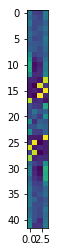

In [30]:
import matplotlib.pyplot as plt
plt.imshow(prob,interpolation='nearest')

### 3. Random sampling, correlations and statistical tests

#### Gaussian distribution

A frequent task in scientific programming is to analyze random samples from a known distribution.  A commonly used distribution is the gaussian (normal distribution)

$$
p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right)
$$

where $\sigma$ is the standard deviation and $\mu$ is the mean

In [31]:
# number of samples
N_gauss = 5000

# standard deviations
s = 2

# mean
u = 5

# draw random samples from gaussian distribution
samples=np.random.normal(u,s,N_gauss)

In [32]:
samples

array([6.12770651, 1.66587179, 5.42853509, ..., 7.49799642, 5.84738046,
       3.25206699])

We can plot the data in two different ways:

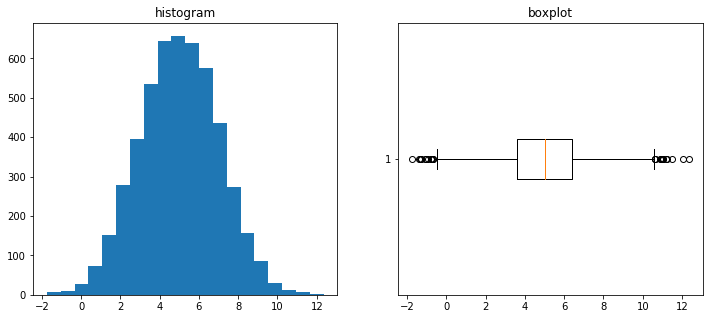

In [33]:
plt.figure(figsize=(12,5))

# plot histogram
plt.subplot(1,2,1)
plt.hist(samples,bins=20)
plt.title('histogram')

# plot boxplot
plt.subplot(1,2,2)
# the default is to produce a vertical boxplot. Setting vert=False gives a horizontal plot
plt.boxplot(samples,vert=False) 
plt.title('boxplot')

plt.show()

### Curve Fitting

A frequent task in science is to fit a curve to data, and guess the underyling generative model. Let's make up some fake noisy data of the form $y=x^3 + \eta$, where $\eta$ is noise drawn from a gaussian (normal) distribution.

In [34]:
# number of data points
N=20

# N equalled spaced x values, from -20 to 20
x=np.linspace(-20,20,N)

# noise term: N samples from a gaussian distribution with mean 0 and standard deviation 1000
noise=np.random.normal(0,1000,N)

# y values
y=x**3+noise

Let's plot our fake noisy data.

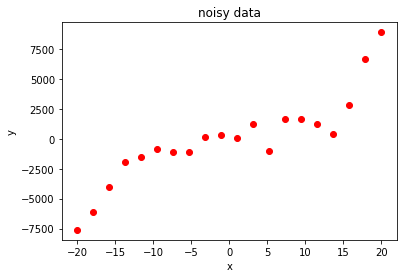

In [35]:
plt.plot(x,y,'ro') # 'r' indicates red, 'o' indicates a small circle
plt.title('noisy data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now we will try to fit polynomials of various orders using the Numpy "polyfit" function.

In [36]:
# straight line fit. The "fit1" array consists of the coefficients of the best linear fit
fit1=np.polyfit(x,y,1)

# 3rd order polynomial fit
fit3=np.polyfit(x,y,3)

# 19th order polynomial fit
fit19=np.polyfit(x,y,19)

# create functions from the fits
y_1=np.poly1d(fit1)
y_3=np.poly1d(fit3)
y_19=np.poly1d(fit19)

print('linear fit: y_1=(%.2f)x+(%.2f)' % (fit1[0],fit1[1]))
print('3rd order fit: y_3=(%.2f)x^3 + (%.2f)x^2 + (%.2f)x + (%.2f)' % (fit3[0],fit3[1],fit3[2],fit3[3]))

linear fit: y_1=(264.57)x+(-15.58)
3rd order fit: y_3=(1.04)x^3 + (0.44)x^2 + (-9.32)x + (-80.63)


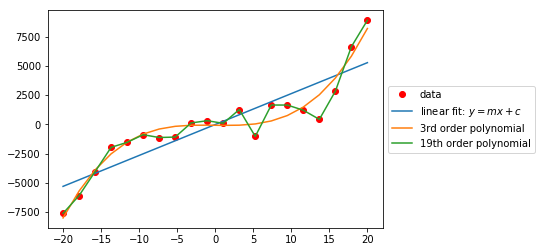

In [37]:
plt.plot(x,y,'ro')
plt.plot(x,y_1(x))
plt.plot(x,y_3(x))
plt.plot(x,y_19(x))

# add a legend to the right of the plot
legend_text=('data','linear fit: $y=mx+c$ ','3rd order polynomial','19th order polynomial')
plt.legend(legend_text, loc='center left', bbox_to_anchor=(1,0.5))

plt.show()

The high order (19th) fit clearly tracks the data better. However, the 19th order polynomial in fact overfits the data since it will perform poorly on new data sampled from the original noisy curve.